In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First we merge speeches and contributions table.

In [4]:
contri_df = pd.read_feather('./contributions_extended.feather')
contri_encoded = pd.get_dummies(contri_df[['speechId', 'type']].drop_duplicates())
contri_encoded_summed = contri_encoded.groupby('speechId').sum()

In [5]:
speeches = pd.read_feather('./speeches_2019_2020.feather')
merged = pd.merge(speeches[['id', 'speechContent']], contri_encoded_summed, left_on='id', right_on="speechId")

We drop not needed fields as below:

In [6]:
merged.drop(columns=['id', 'speechContent', 'type_Personen-Einruf', 'type_Zuruf'], inplace=True)

In [11]:
merged.head()

,type_Beifall,type_Heiterkeit,type_Lachen,type_Unruhe,type_Widerspruch,type_Zustimmung
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0


Now, we count each of these contributions and do a bar plot, we see that Beifall has hightest count.

In [8]:
types_count = {}
for c in merged.columns:
    types_count[c.split('_')[1]] = len(merged[merged[c] == 1])
types_count = pd.DataFrame(types_count.items(), columns=['Type', 'Count'])
types_count

,Type,Count
0,Beifall,20953
1,Heiterkeit,859
2,Lachen,938
3,Unruhe,0
4,Widerspruch,438
5,Zustimmung,14


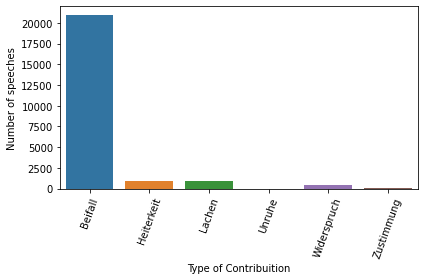

In [10]:
sns.barplot(data=types_count, y='Count', x='Type')
plt.xticks(rotation=70)
plt.tight_layout()
plt.ylabel('Number of speeches')
plt.xlabel('Type of Contribuition')
plt.savefig('images/contri.eps', bbox_inches='tight')